In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/flowers')

Found 4317 images belonging to 5 classes.


In [7]:
xtest = test_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/flowers')

Found 4317 images belonging to 5 classes.


CNN Model Creation

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense 

In [14]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))


Compiling the model

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Fit The Model

In [16]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [19]:
early_stopping= EarlyStopping(monitor='val_accuracy',
                              patience=5)
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',
                              patience=5,
                            factor=0.5,min_lr=0.00001)
callback=[reduce_lr,early_stopping]



In [20]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=100,
                    callbacks=callback,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100


InvalidArgumentError: ignored

Saving The Model

In [21]:
model.save('Flower.F5')

Testing The Model

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [26]:
img=image.load_img('/content/drive/MyDrive/Classroom/flowers/rose/10090824183_d02c613f10_m.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['daisy','dandelion','rose']
op[pred]

1/1 [==============================] - 0s 96ms/step


'rose'

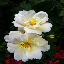

In [27]:
img